# Badanie klątwy wymiaru

**Przedmiot: Podstawy Uczenia Maszynowego**<br>
**Wykonał: Paweł Kruczkiewicz**<br>
Kraków, 14.03.2022 r.

**Celem ćwiczenia jest** zbadanie problemu klątwy wymiaru, który jest jednym z trudniejszych problemów w uczeniu maszynowym. Poniżej przeanalizowane zostaną trzy sposoby na pokazanie tego problemu. Opierają się na analizie metodą Monte Carlo zbioru puntów w hipersześcianie a następnie na :
   1. Sprawdzeniu kąta między dwoma wylosowanymi n-wymiarowymi wektorami.
   2. Wyliczeniu, jaka część lpunktów w hipersześcianie znajduje się wewnątrz kuli wyznaczonej przez 2 losowo wybrane punkty
   3. Wyliczeniu stosunku różnicy i średniej dla dwóch długości odcinków powstałych przez wylosowanie 3 punktów.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Przydatne funkcje
 - `get_random_points_from_hipercube(N, D)` - **Losowanie `N` punktów w `D`-wymiarowej przestrzeni**, gdzie wartości punktów w poszczególnych wymiarach są w zakresie \[0, 1)

In [2]:
def get_random_points_from_hipercube(N, D):
    return np.random.rand(N, D)

 - `calculate_random_angles(P, N)` - Zwraca **listę `N` kątów** dla `N` wylosowanych par ze zbioru pubków `P`

In [3]:
def choose_random_point(P):
    rand_ind = np.random.randint(P.shape[0])
    return P[rand_ind, :]

def choose_random_vector(P):
    return choose_random_point(P) - choose_random_point(P)

def calculate_angle(v1, v2):
    v1_u = v1 / np.linalg.norm(v1)
    v2_u = v2 / np.linalg.norm(v2)
    angle_in_radians =  np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    return np.degrees(angle_in_radians)

def calculate_random_angles(P, N):
    pairs_of_random_vectors = [ (choose_random_vector(P), choose_random_vector(P)) for _ in range(N)]
    return np.array([calculate_angle(v1, v2) for v1, v2 in pairs_of_random_vectors])

 - `calculate_percent_of_points_in_random_sphere(P, N)` - Zwraca  **procent punktów znajdujących sie w sferze wyznaczonej przez 2 losowo wybrane punkty** ze zbioru `P` w formie listy długości `N` 

In [4]:
def get_percent_of_points_inside_sphere(P, x, radius):
    distances_from_point = np.array([np.linalg.norm(v - x) for v in P])
    no_points_inside_sphere = distances_from_point[distances_from_point < radius].shape[0]
    return (no_points_inside_sphere / P.shape[0]) * 100

def calculate_percent_of_points_in_random_sphere(P, N):
    centre_points = [choose_random_point(P) for _ in range(N)]
    sphere_points = [choose_random_point(P) for _ in range(N)]
    radia = [np.linalg.norm(p1 - p2) for p1, p2 in zip(centre_points, sphere_points)]
    
    return np.array([get_percent_of_points_inside_sphere(P, x, radius)
                     for x, radius in zip(centre_points, radia)])

 - `calucalate_percent_of_points(P, N)` - Zwraca % średniej dwóch odległości w stosunku do różnicy między nimi, gdzie odległością są długości dwóch odcinków z trzech losowo wylosowanych punktów

In [5]:
def calculate_percent_for_three_points(P):
    p1, p2, p3 = choose_random_point(P), choose_random_point(P), choose_random_point(P)
    r1, r2 = np.linalg.norm(p2 - p1), np.linalg.norm(p3 - p1)
    r_avg = np.average([r1, r2])
    r_diff = abs(r2 - r1)
    return (r_diff/r_avg)*100

def calculate_percent_of_points(P, N):
    return [calculate_percent_for_three_points(P) for _ in range(N)]

- tworzenie listy średnich i odchyleń standardowych dla danych wymiarów dla danej funkcji

Dzięki tej funkcji możemy łatwo przeanalizować wyniki powyżej zaimplementowanych funkcji. Przyjęto, że liczba powtórzeń eksperymentu będzie równa 100.

W implementacji losujemy również zbiór punktów w hipersześcianie. Przyjęto, że liczba punktów w nim wynosi 10000, bo taka liczba liczy się względnie niedługo dla każdej z powyższych funkcji.

In [6]:
NUMBER_OF_POINTS = 10000
NUMBER_OF_REPEATS = 100

def get_means_and_stds(func, dimensions):
    sets_of_points = [get_random_points_from_hipercube(NUMBER_OF_POINTS, dimension) for dimension in dimensions]
    results = np.array([func(point_set, NUMBER_OF_REPEATS) for point_set in sets_of_points])
    means = np.average(results, axis=1)
    errors = np.std(results, axis=1)
    return means, errors

- rysowanie wykresu słupkowego

In [7]:
def draw_bar_plot(CTEs, errors, dimensions, title, y_label):
    fig, ax = plt.subplots()
    
    dim_str = [str(dim) for dim in dimensions]
    ax.bar(dim_str, CTEs, yerr=errors, ecolor='black', capsize=5, width=0.5, alpha=0.5)
    
    ax.set_ylabel(y_label)
    ax.yaxis.grid(True)
    
    ax.set_xlabel("Dimensions")
    ax.set_title(title)    
    
    fig.set_figwidth(10)
    fig.set_figheight(6)
    plt.show()

 - rysowanie histogramu

In [8]:
def draw_histogram(results, title, bins=10):
    fig, ax = plt.subplots()
    
    ax.hist(results, bins, alpha=0.5)
    ax.set_title(title)
    
    ax.set_xlabel("Angle in °")
    ax.set_ylabel("Number of occurences")
    ax.yaxis.grid(True)
    
    fig.set_figwidth(10)
    fig.set_figheight(6)
    plt.show()

 - rysowanie wykresu słupkowego wraz z linią

In [17]:
def draw_barplot_with_line(CTEs, errors, dimensions, title, y_label):
    fig, ax = plt.subplots()
    
    dim_str = [str(dim) for dim in dimensions]
    ax.bar(dim_str, CTEs, yerr=errors, ecolor='black', capsize=5, width=0.5, alpha=0.5)
    ax.plot(CTEs, color="red", marker=".", linewidth=3,  linestyle='dashed')
    
    ax.set_ylabel(y_label)
    ax.yaxis.grid(True)
    
    ax.set_xlabel("Dimensions")
    ax.set_title(title)    
    
    fig.set_figwidth(10)
    fig.set_figheight(6)
    plt.show()

# Wyniki
## Badane wymiary
Przyjęto, że wszystkie punkty zostaną zbadane dla rosnącej potęgowo liczby wymiarów, czyi dla kolejnych potęg 5.

In [10]:
dimensions = [5**i for i in range(1, 6)]

## Losowe kąty
Przyjrzyjmy sie najpierw, jak wyglądają wykresy słupkowe dla kolejnych wymiarów.

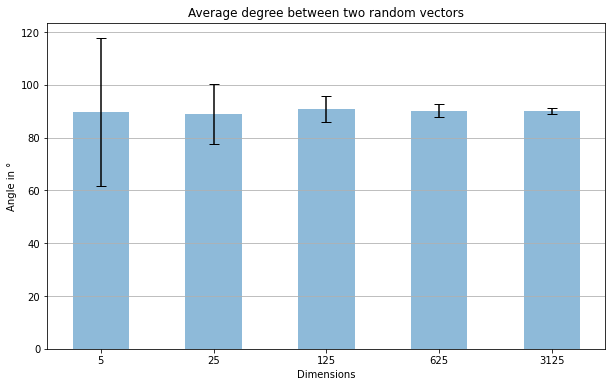

In [11]:
title = "Average degree between two random vectors"
y_label = "Angle in °"
degree_means, degree_stds = get_means_and_stds(calculate_random_angles, dimensions)
draw_bar_plot(degree_means, degree_stds, dimensions, title, y_label)

Wartości oscylują około 90 stopni. Odchylenia standardowe jednak zmniejszają się znacząco z każdym kolejnym wymiarem. Prześledźmy histogram dla dwóch skrajnie różnych wymiarów:

**5 wymiarów**

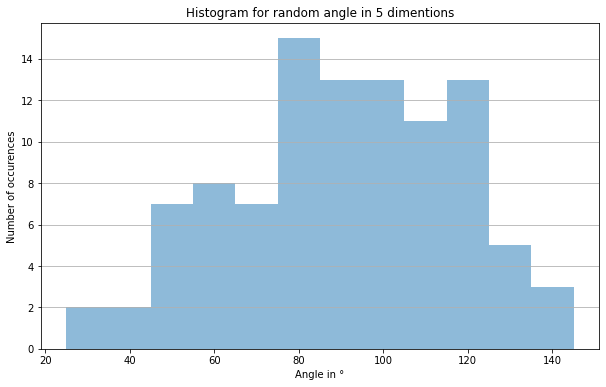

In [12]:
P_5 = get_random_points_from_hipercube(NUMBER_OF_POINTS, 5)
result_5d = calculate_random_angles(P_5, NUMBER_OF_REPEATS)
bins = np.arange(25, 155, 10)
draw_histogram(result_5d, title="Histogram for random angle in 5 dimentions", bins=bins)

**625 wymiarów**

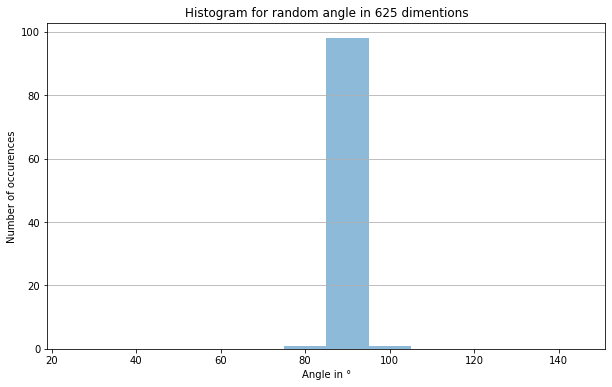

In [13]:
P_625 = get_random_points_from_hipercube(NUMBER_OF_POINTS, 625)
result_625d = calculate_random_angles(P_625, NUMBER_OF_REPEATS)
bins = np.arange(25, 155, 10)
draw_histogram(result_625d, title="Histogram for random angle in 625 dimentions", bins=bins)

Widać wyraźna tendencję - wraz ze wrostem liczby wymiarów coraz trudniej jest wylosować wektor znacząco różny od 90 stopni. Dowodem na to może być to, że niemal wszystkie wartości dla 625 wymiarów lądują w przedziale \[85, 95) stopnia.

## Wykres słupkowy dla kuli powstałej z losowo wybranych 2 punktów.

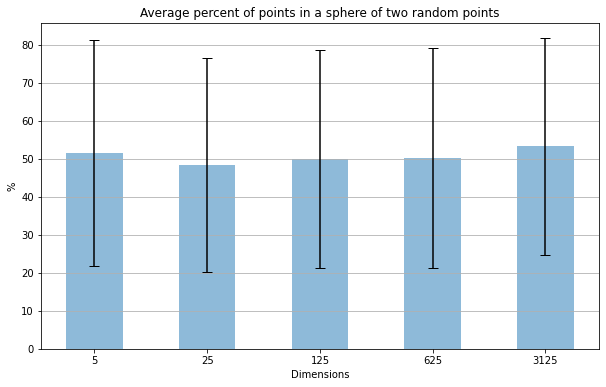

In [14]:
title = "Average percent of points in a sphere of two random points"
y_label = "%"
sphere_means, sphere_stds = get_means_and_stds(calculate_percent_of_points_in_random_sphere, dimensions)
draw_bar_plot(sphere_means, sphere_stds, dimensions, title, y_label)

Wynik jest zaskakujący. W tym przypadku nie widzimy już tendencji do zmniejszania się odchylenia standardowego ani też mierzona wartość nie dąży do zera. Co więcej - przed eksperymentem można było przypuszczać, że słupki będą maleć ze względu na analogiczność tego eksperymentu z mierzeniem stosunku hiperkuli do opisanego na niej hipersześcianu w n-wymiarach.

Okazuje się jednak, że losowanie wymiaru kuli *w kontrolowanych warunkach* nie prowadzi do takich problemów.

## Stosunek różnicy do średniej długości dwóch losowo wybranych odcinków

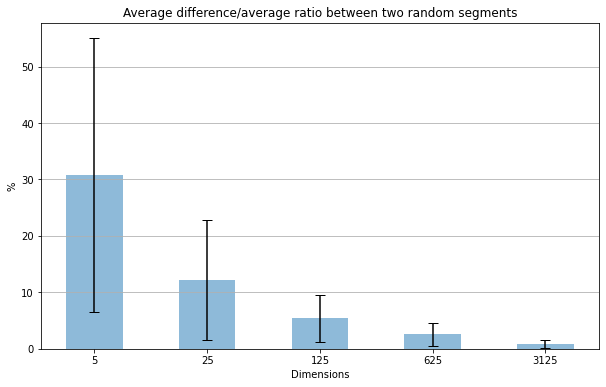

In [15]:
title = "Average difference/average ratio between two random segments"
y_label = "%"
ratio_means, ratio_stds = get_means_and_stds(calculate_percent_of_points, dimensions)
draw_bar_plot(ratio_means, ratio_stds, dimensions, title, y_label)

Jak widać na powyższym rysunku - mierzony stosunek wyraźnie maleje. Z każdym koejnym wymiarem nie tylko zanika różnorodność, ale mierzona wartość dąży do zera. Dobrze to widać na wykresie liniowym, który nałożymy na powyższy diagram.

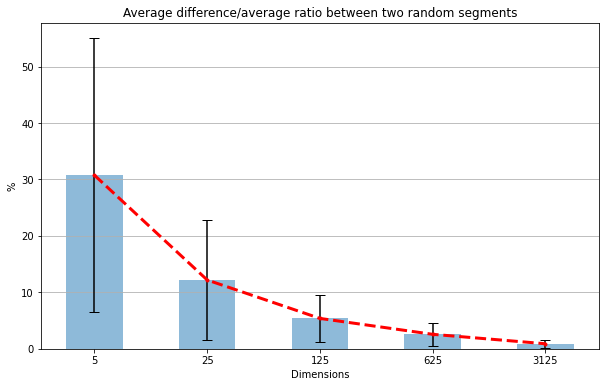

In [18]:
draw_barplot_with_line(ratio_means, ratio_stds, dimensions, title, y_label)

Dzięki dużej, czerwonej, przerywanej linii wykres staje sie bardziej przekonujący.

# Wnioski

Powyższe eksperymenty mozna podsumować słowami Witkacego:

*Punkt się rozprężył w n-wymiarów przestrzeń<br>
I przestrzeń klapła<br>
Jak przekłuty balon.*

Badając klątwę wymiaru dochodzimy do paradoksalnych wniosków - chcąc zwiększyć informacje o obiekcie poprzez poszerzenie wiedzy o kolejne wymiary, tracimy zdolność rozróżniania obiektów od siebie. W nieskończoności nic do niczego jest niepodobne - ta myśl jakkolwiek nasuwająca się sama, tworzy rozdarcie w ludzkim postrzeganiu, bo jak można zwiększając rozmiar informacji jednocześnie je tracić? Fakt ten mnie jako (miejmy nadzieję) przyszłego inżyniera niepokoi, a jako humanistę - przeraża. Okazuje się, że problem poznania nawet przy przyjęciu zgrubnych arystetelesowskich założeń staje się trudny do opisania nawet poprzez jedno z najbardziej racjonalnych narzędzi jakimi dysponuje człowiek, którym jest matematyka.

Pozostaje nam jedynie liczyć na to, że nasz (jak to opisuje F. Dostojewski) *umysł euklidesowy, ziemski* chociaż nie potrafi pojąć intuicyjnie tego filozoficzngo problemu, tak będzie w stanie go w jakiś sposób ujarzmić, obejść. Oczywiście wpędzamy się co zatem idzie w błędne koło - jeżeli bedziemy chcieli porównywać, które wymiary lepiej opisują przestrzeń, którą chcemy przewidzieć, dokładamy sobie kolejną (a może kolejne) metryki. Która jednak z tych metryk jest najważniejsza? To trzeba już ocenić arbitralnie, postawić granicę przejawiającej się w nas, studentach AGH bez metafizycznego pojęcia o rzeczywistości, chęci do zmierzenia i zważenia wszystkiego, co dookoła, dokonując wyboru, żegnając się z bezpiecznym siedziskiem obserwatora i przyjmując rolę rządcy czy sędziego. 

*Ważę ciężary o jakich nie myślał żaden cezar świata<br>
a wszystko ulata, ulata jak wata, ulata jak wata<br>
hop szklankę piwa hop*